# Lecture7　パターン認識1
<div dir='rtl'>
2022.4岩政
</div>

ハードマージン

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.datasets import make_classification, make_circles, make_moons 

# 散布図で独自のカラーマップを使用
from matplotlib.colors import ListedColormap 
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

2クラス(0, 1)のデータ生成，詳細は次を参照  
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

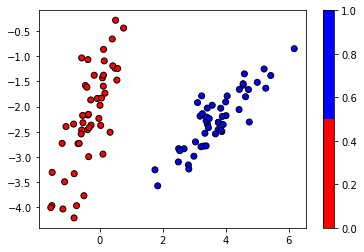

In [2]:
X, y = make_classification( n_samples=100, n_features=2, n_informative=2, n_redundant=0, 
                            n_classes=2, n_clusters_per_class=1, 
                            class_sep=2.0, #　大きいほどクラス分離の距離が大きい 
                            shift=None, 
                            random_state=5) # 整数を与えると乱数の再現性がある
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm_bright, edgecolors='k')
plt.colorbar()

smv.SVC のドキュメント  
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html  
http://scikit-learn.org/stable/modules/svm.html

In [3]:
clf = svm.SVC(kernel='linear', C=1000) # clf : classificationの略, 線形カーネル（内積）
clf.fit(X, y)

SVC(C=1000, kernel='linear')

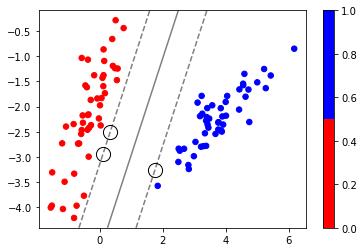

In [4]:
cbar = plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=cm_bright) # c=y, yが示すラベル0, 1で色分け
plt.colorbar(cbar)
# plot the decision function
ax = plt.gca() # get current axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
# 超平面までの距離を求め，次にグリッドに合わせてreshape((30,30))
Z = clf.decision_function(xy).reshape(XX.shape) 
# マージンの境界線と超平面を等高線に描く
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, #等高線の本数と間隔をlevelsで指定
           linestyles=['--', '-', '--'])
# サポートベクタを白丸でプロット
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, c='w', edgecolors='k')

In [5]:
testX=np.array([[1.0, -3.0], [1.0, -2.5]])
judge = clf.predict(testX)
judge

array([1, 0])

Circles　円状のデータ生成　
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html

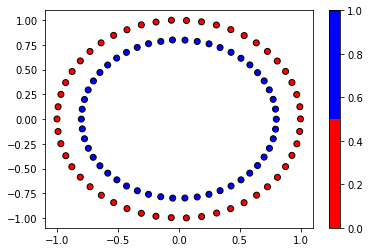

In [6]:
X, y = make_circles(noise = 0.001, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm_bright, edgecolors='k')
plt.colorbar()

In [7]:
clf = svm.SVC(kernel='rbf', C=1000) # ガウシアンカーネル
clf.fit(X, y)

SVC(C=1000)

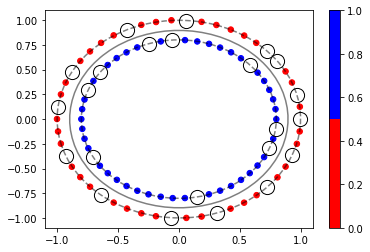

In [9]:
cbar = plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=cm_bright) # yは，ラベル0, 1があり，それで色分け
plt.colorbar(cbar)
# plot the decision function
ax = plt.gca() # get current axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape) #超平面までの距離を求め，次に グリッドに合わせてreshape((30,30))
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], #等高線の本数と間隔をlevelsで指定
           alpha=0.5, linestyles=['--', '-', '--'])
# サポートベクタを白丸でプロット
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, c='w', edgecolors='k')

Moons 月状のデータ生成　http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

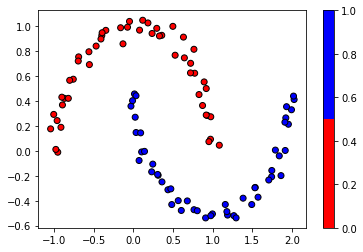

In [10]:
X, y = make_moons(noise = 0.05, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm_bright, edgecolors='k')
plt.colorbar()


In [11]:
clf = svm.SVC(kernel='poly', degree=3, coef0=1.0, C=1000) # 多項式カーネル
clf.fit(X, y)

SVC(C=1000, coef0=1.0, kernel='poly')

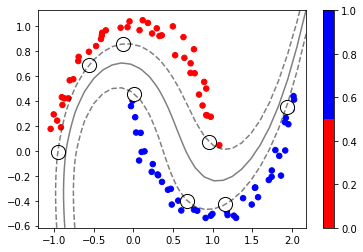

In [12]:
cbar = plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=cm_bright) # yは，ラベル0, 1があり，それで色分け
plt.colorbar(cbar)
# plot the decision function
ax = plt.gca() # get current axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape) #超平面までの距離を求め，次に グリッドに合わせてreshape((30,30))
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, #等高線の本数と間隔をlevelsで指定
           linestyles=['--', '-', '--'])
# サポートベクタを白丸でプロット
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, c='w', edgecolors='k')

# SVM ソフトマージン
sklearn.model_selection.train_test_split http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html  
sklearn.metrics http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics  

matplotlibのカラーマップを使用
https://matplotlib.org/users/colormaps.html

In [13]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm # maplotlibのカラーマップを使用
%matplotlib inline

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import   accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.datasets import make_classification

In [14]:
X, y = make_classification( n_samples=100, n_features=2, n_informative=2, n_redundant=0, 
                            n_classes=2, n_clusters_per_class=1, 
                            class_sep=0.4, #　大きいほどクラス分離の距離が大きい 
                            shift=None, 
                            random_state=5) # 整数を与えると乱数の再現性がある

#### トレーニングデータとテストデータに分離（split）
sklearn.model_selection.train_test_split  
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

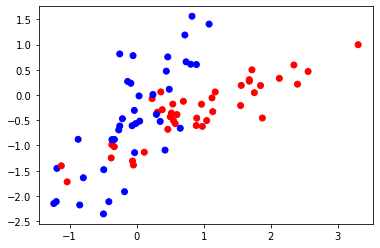

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cm.bwr)

In [16]:
clf = svm.SVC(kernel='linear', C=10000) # Cの値を大きくして，なるべく他クラスへの混入を認めない
clf.fit(X_train, y_train)

SVC(C=10000, kernel='linear')

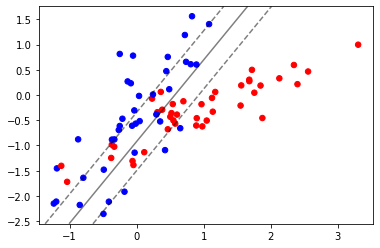

In [17]:
plt.scatter(X_train[:, 0], X_train[:, 1], s=30, c=y_train, cmap=cm.bwr)
# plot hyper-plane and margin liness as the lines
ax = plt.gca() # get current axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate the lines
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
# 超平面までの距離を求め，次にグリッドに合わせてreshape((30,30))
Z = clf.decision_function(xy).reshape(XX.shape)
# マージンの境界線と超平面を等高線に描く
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, #等高線の本数と間隔をlevelsで指定
           linestyles=['--', '-', '--'])
# plot support vectors
#ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, c='w', edgecolors='k')

#### トレーニングデータに対する評価

In [18]:
y_train[0:10]
print('トレーニングデータ　正解率', clf.score(X_train, y_train))  

トレーニングデータ　正解率 0.8


In [19]:
y_train_pred = clf.predict(X_train)
print("予測値: %s" % y_train_pred)
print("真値　: %s" % y_train)

予測値: [0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 1 1]
真値　: [0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1
 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1
 0 0 1 0 1 1]


トレーニングデータに対する評価，下記のaccuracy と上記のclf.score()は同じ計算

In [20]:
print('confusion = \n %s' % confusion_matrix(y_train, y_train_pred)) # 混同行列
print('accuracy = %f ' % accuracy_score(y_train, y_train_pred))  # 正答率
print('precision = %f ' % precision_score(y_train, y_train_pred)) # 適合率
print('recall = %f ' % recall_score(y_train, y_train_pred)) # 再現率
print('F-measure = %f' % f1_score(y_train, y_train_pred)) # F-値

confusion = 
 [[32  7]
 [ 9 32]]
accuracy = 0.800000 
precision = 0.820513 
recall = 0.780488 
F-measure = 0.800000


In [21]:
print( classification_report(y_train, y_train_pred)) # 正答率（accuracy）はavg/totalに

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        39
           1       0.82      0.78      0.80        41

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80



上記の結果の見方，"0", "1"はクラス名で，それぞれの立場での 評価指標が示されている。
上記の一つ一つの評価では，"1"の立場で見ていることと同じである。また，F-measureとf1-scoreは同じ量を示す。

#### テストデータに対する評価

In [22]:
y_test_pred = clf.predict(X_test)
print("予測値: %s" % y_test_pred)
print("真値　: %s" % y_test)

予測値: [0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1]
真値　: [1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1]


In [23]:
print('テストデータ　　　　　正解率', clf.score(X_test, y_test))   
print('confusion = \n %s' % confusion_matrix(y_test, y_test_pred))
print('accuracy = %f ' % accuracy_score(y_test, y_test_pred))
print('precision = %f ' % precision_score(y_test, y_test_pred))
print('recall = %f ' % recall_score(y_test, y_test_pred))
print('F-measure = %f' % f1_score(y_test, y_test_pred))

テストデータ　　　　　正解率 0.9
confusion = 
 [[10  1]
 [ 1  8]]
accuracy = 0.900000 
precision = 0.888889 
recall = 0.888889 
F-measure = 0.888889


In [24]:
print( classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.89      0.89      0.89         9

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



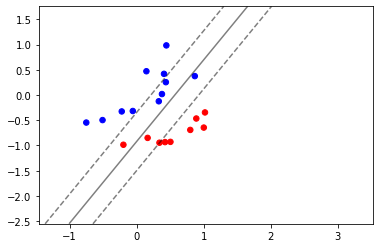

In [25]:
plt.scatter(X_test[:, 0], X_test[:, 1], s=30, c=y_test, cmap=cm.bwr)
ax = plt.gca() # get current axis
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,            linestyles=['--', '-', '--'])

# GridSerachの使用例
sklearn.model_selection.GridSearchCV  
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

3.2. Tuning the hyper-parameters of an estimator
http://scikit-learn.org/stable/modules/grid_search.html#grid-search  

Mlxtend (machine learning extensions) is a Python library of useful tools for the day-to-day data science tasks <br>
https://rasbt.github.io/mlxtend/
- Plotting Decision Regions https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

In [26]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm # maplotlibのカラーマップを使用
%matplotlib inline

from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

from mlxtend.plotting import plot_decision_regions #決定領域のプロット，外部ライブラリを利用
#上記のインストールはAnacondaとは別途必要


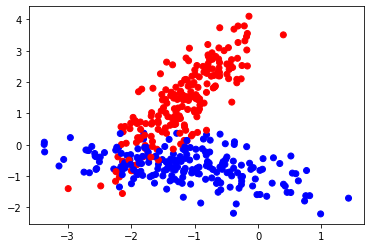

In [27]:
Num = 400 # 全サンプル数
CV = 5    # サンプル数をCV(Cross Validation)だけ分割する
X, y = make_classification( n_samples=Num, n_features=2, n_informative=2, n_redundant=0, 
                            n_classes=2, n_clusters_per_class=1, 
                            class_sep=1.0, #　分離度
                            shift=None, 
                            random_state=5) # 乱数の再現性
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm.bwr)

In [28]:

# グリッドサーチ用パラメータの設定
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1.0, 10.0], 'gamma':[0.01, 0.1, 1.0, 10.0]}
svc = svm.SVC()

In [29]:
# グリッドサーチの実行
clf = GridSearchCV(svc, parameters, scoring='accuracy', cv=CV)
clf.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 10.0], 'gamma': [0.01, 0.1, 1.0, 10.0],
                         'kernel': ('linear', 'rbf')},
             scoring='accuracy')

In [30]:
# 最適パラメータの表示
print('Best accuracy = ',clf.best_score_)
print(clf.best_params_)

Best accuracy =  0.925
{'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}


In [31]:
# 最適パラメータによる識別器を全データに適用，テストデータは後述
best_clf = clf.best_estimator_
pred = best_clf.predict(X)

print('Accuracy score = ',accuracy_score(y, pred))
print(classification_report(y, pred))

Accuracy score =  0.94
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       200
           1       0.96      0.92      0.94       200

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



#### 新テストデータの作成
今回，度，make_classificationを用いて，データを発生させ，それをテストデータに用いる。

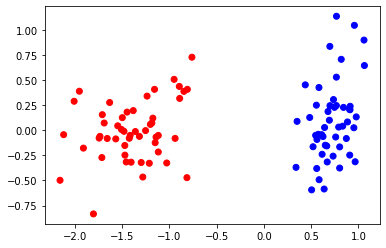

In [32]:
Num = 100 # 追加サンプル数
X_test, y_test = make_classification( n_samples=Num, n_features=2, n_informative=2, n_redundant=0, 
                            n_classes=2, n_clusters_per_class=1, 
                            class_sep=1.0, #　分離度
                            shift=None, 
                            random_state=1) # 異なる確率過程
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=cm.bwr)

In [33]:
y_test_pred = best_clf.predict(X_test) # y_testに対するprediction

print('Accuracy score = ',accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Accuracy score =  0.74
              precision    recall  f1-score   support

           0       0.66      1.00      0.79        50
           1       1.00      0.48      0.65        50

    accuracy                           0.74       100
   macro avg       0.83      0.74      0.72       100
weighted avg       0.83      0.74      0.72       100



Text(0.5, 0, '(b) Test data')

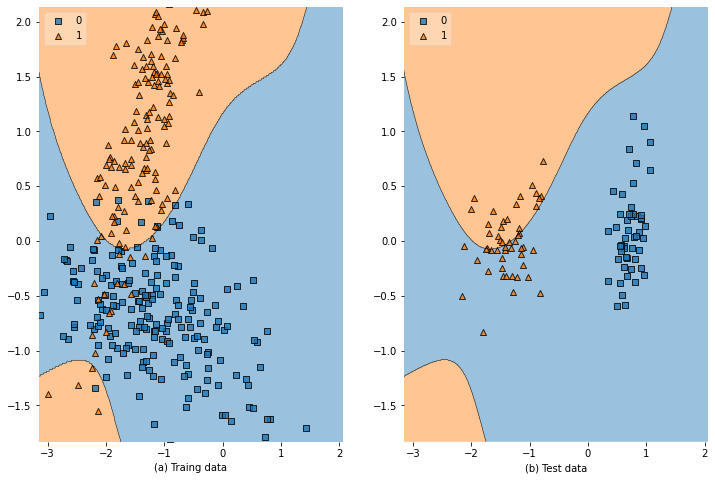

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12,8), sharex=True, sharey=True)
plot_decision_regions(X,y, clf=best_clf, ax=axes[0], legend=2)
axes[0].set_xlabel('(a) Traing data')

plot_decision_regions(X_test, y_test, clf=best_clf, ax=axes[1], legend=2)
axes[1].set_xlabel('(b) Test data')


# SVM 多クラス分類，Iris

In [35]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

from sklearn.svm import SVC
#from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import datasets

from mlxtend.plotting import plot_decision_regions #決定領域のプロット，外部ライブラリを利用


irisデータのうち，sepal（がく）と petal（花びら）の長さ[cm]によるクラス分類を行う。  
iris.dataの0番目と2番目の要素だけを抽出してXの配列(150 x 2)に格納    
クラス(花びらの種類 0:Iris-Setosa, 1:Iris-Versicolour, 2:Iris-Virginica)を y(150 x 1)に格納

In [36]:
# Load iris data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

In [37]:
y[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

ガウシアンカーネルで ovr(one-vs-rest) と ovo(one-vs-one) の比較を行う  
ディフォルトで decision_function_shape='ovr'であるが，敢えて明示的に指定

In [38]:
clf = SVC(C=0.5, kernel='rbf', decision_function_shape='ovr').fit(X,y)
print(clf)
y_pred = clf.predict(X)
print('Accuracy = ',accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

SVC(C=0.5)
Accuracy =  0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.96      0.94        50
           2       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



Text(0.5, 1.0, 'SVM with RBF, ovr')

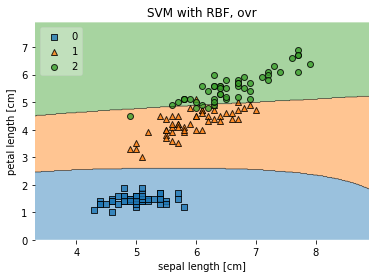

In [39]:
plot_decision_regions(X,y, clf=clf,  legend=2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM with RBF, ovr')

decision_function_shape='ovo'とする

In [40]:
clf = SVC(C=0.5, kernel='rbf', decision_function_shape='ovo').fit(X,y)
print(clf)
y_pred = clf.predict(X)
print('Accuracy = ',accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

SVC(C=0.5, decision_function_shape='ovo')
Accuracy =  0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.96      0.94        50
           2       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



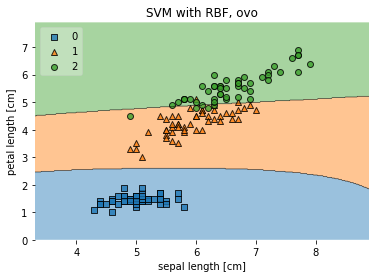

In [41]:
plot_decision_regions(X,y, clf=clf,  legend=2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM with RBF, ovo')
plt.show()

ovrとovoとで，あまり差がないことが認められた

次に，グリッドサーチを用いて，irisデータに対する最良のクラス分類器を求める

In [42]:
# グリッドサーチ用パラメータを設定
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[0.1, 1.0, 10.0], 
              'gamma':[0.01, 0.1, 1.0, 10.0], 'decision_function_shape':('ovo', 'ovr')}
svm = SVC()

In [43]:
# グリッドサーチを実行
clf = GridSearchCV(svm, parameters, scoring='accuracy', cv=5) #交差検証のデータ分割を5とした
clf.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 10.0],
                         'decision_function_shape': ('ovo', 'ovr'),
                         'gamma': [0.01, 0.1, 1.0, 10.0],
                         'kernel': ('linear', 'rbf', 'poly')},
             scoring='accuracy')

In [53]:
# 最良パラメータを表示
print('Best accuracy =', clf.best_score_)
print(clf.best_params_)

Best accuracy = 0.9666666666666668
{'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 10.0, 'kernel': 'poly'}


多項式カーネルで，  
decision_function_shape='ovo'の方が'ovr'よりも識別精度が高い結果を得た

Accuracy = 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.92      0.95        50
           2       0.92      0.98      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



<AxesSubplot:>

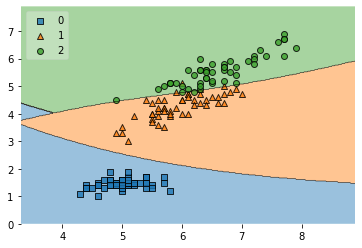

In [44]:
# 最適パラメータによる識別器を全データに適用，テストデータは後述
bst_clf = clf.best_estimator_
y_est = bst_clf.predict(X)
print('Accuracy =', accuracy_score(y, y_est))
print(classification_report(y, y_est))
plot_decision_regions(X,y, clf=bst_clf,  legend=2)

上記のグラフを見て，分類する決定領域が複雑すぎて使いにくいと感じたら，決定領域線を直線で構成する線形カーネルも試してみてください

#### 4つの説明変数を用いる
SVCのパラメータの決め方は，本来ならば改めてGridSearchを適用するところであるが，ここでは，上のGrid Searchの結果に従う。

In [45]:
X = iris.data
y = iris.target
clf = SVC(C=0.1, kernel='poly', gamma=10.0, decision_function_shape='ovo').fit(X,y)
print(clf)
y_pred = clf.predict(X)
print('Accuracy = ',accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

SVC(C=0.1, decision_function_shape='ovo', gamma=10.0, kernel='poly')
Accuracy =  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



Text(0, 0.5, 'petal length [cm]')

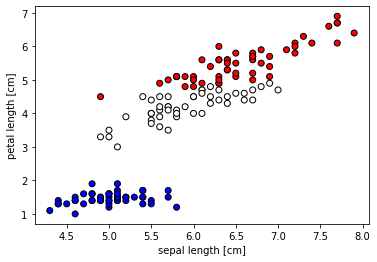

In [46]:
plt.scatter(X[:,0],X[:,2], c=y_est, cmap=cm.bwr, edgecolors='k')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')

Text(0, 0.5, 'petal widht [cm]')

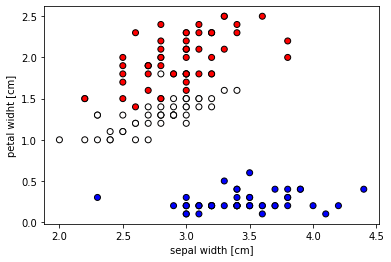

In [47]:
plt.scatter(X[:,1],X[:,3], c=y_est, cmap=cm.bwr, edgecolors='k')
plt.xlabel('sepal width [cm]')
plt.ylabel('petal widht [cm]')